# COGS 118B - Final Project

# Insert title here

## Group members

- Ana Maria Baboescu
- Fatima Enriquez
- Eric Lin

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables


Create an Artificial Intelligence (AI) algorithm that successfully wins the game of chess in as few moves as possible and this would be a two player game (one player vs AI). The data that we are using is based on the performance of AI and their opponents from previous completed games. The manner in which we are measuring the data is by documenting the scores each player has at the end of the completed games. We are utilizing the data to help reinforce the AI system. Performance is measured by the type of pieces/the number of pieces that a player takes out from their opponent and the ability to checkmate the king piece.

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 





There has been ample research regarding the use of AI to solve problems. Due to the increase in popularity of online games such as chess, sudoku, and solitaire, more individuals are inclined to play them virtually. Having this virtual access was key, especially during the pandemic <a name="cite_2"></a>[<sup>[2]</sup>](#cite_2). However, the concern for many is how to detect cheating. The European Online Championship details that it is paramount to keep the integrity of the game to the point where more than eight participants, in 2020, were deemed disqualified for utilizing aid <a name="cite_3"></a>[<sup>[3]</sup>](#cite_3). In this manner, there is a desire for softwares to be able to detect cheating in an online game <a name="cite_1"></a>[<sup>[1]</sup>](#cite_1). The use of AI in online chess matches makes it easier for the person cheating to win the game. While it is fascinating to imagine how a program can win such a strategic game, ethically, it is paramount that as a society we use AI as a learning tool. 

Nonetheless, the desire to solve problems and expand the realm of artificial intelligence has been around for decades. In one of the most infamous games of chess played by Garry Kasparov and Deep Blue, the machine won by one point <a name="cite_1"></a>[<sup>[1]</sup>](#cite_1). Deep Blue is a software created by International Business Machines Corporation (IBM), which consisted of 32 processors and produced “high-speed computations in parallel”. Deep Blue was thus able to evaluate about 200 million chess positions per second and held a “processing speed of 11.38 billion floating-point operations per second” <a name="cite_4"></a>[<sup>[4]</sup>](#cite_4).This breakthrough to be able to have a machine detect and think like a human is evolutionary to the point where the legendary match, where Deep Blue won was due to the computational build of the machine. This is because the machine has such a high processing speed and evaluation power <a name="cite_1"></a>[<sup>[1]</sup>](#cite_1).

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).


One of the widely known games, Chess, is a game typically associated with strategy and skill with multiple different styles of playing/executing. Thus, the success of the player is determined by the manner in which both players move. This can frequently be quite difficult for beginners, because without AI, one would have to seek different skill-leveled individuals to build one's mastery of the game. However, with AI, each time the player plays the system, it would be different for the player due to the reinforcement learning of past games it has played including its experience with the current player.

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


In [3]:
import chess
import chess.pgn
import chess.engine
import chess.svg
import random
from math import log, sqrt, e, inf

# for the gif
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt 
from matplotlib.pyplot import colormaps



In [4]:
class Node():
    def __init__(self):
        self.state = chess.Board() # current position of board
        self.children = set() # set of all possible states from legal action from current node
        self.parent = None # parent node of current node
        self.N = 0 # number of times parent node has been visited
        self.n = 0 # number of times current node has been visited
        self.v = 0 # exploitation factor of current node
        self.ucb = 0 #U pper confidence bound
    def __lt__(self, other):
        return self.ucb < other.ucb
def ucb1(curr_node):
    ans = curr_node.v + 2 * (sqrt(log(curr_node.N + e + (10 ** -6))/(curr_node.n + (10 ** -10))))
    return ans



In [5]:
def evaluate_board(board):
    piece_values = {
        chess.PAWN: 1,
        chess.KNIGHT: 3,
        chess.BISHOP: 3,
        chess.ROOK: 5,
        chess.QUEEN: 10,
        chess.KING: 0
    }
    value = 0
    for piece_type in piece_values:
        value += len(board.pieces(piece_type, chess.WHITE)) * piece_values[piece_type]
        value -= len(board.pieces(piece_type, chess.BLACK)) * piece_values[piece_type]
    return value

In [6]:
def rollout(curr_node):
    board = curr_node.state 
    if board.is_game_over():
        result = board.result()
        if result == '1-0':
            return 1
        elif result == '0-1':
            return -1
        else:
            return 0
    return evaluate_board(board) / 100

In [7]:
def expand(curr_node, white):
    if (len(curr_node.children) == 0):
        return curr_node
    max_ucb = -inf
    if(white):
        idx = -1
        max_ucb = -inf
        sel_child = None
        for i in curr_node.children:
            tmp = ucb1(i)
            if( tmp > max_ucb):
                idx = i
                max_ucb = tmp
                sel_child = i
        return (expand(sel_child, 0))
    else:
        idx = -1
        min_ucb = inf
        sel_child = None
        for i in curr_node.children:
            tmp = ucb1(i)
            if (tmp < min_ucb):
                idx = i
                min_ucb = tmp
                sel_child = i
        return expand(sel_child, 1)

In [8]:
rewards = [] # list that stores rewards

def rollback(curr_node, reward):
    curr_node.n += 1
    curr_node.v += reward
    while (curr_node.parent != None):
        curr_node.N += 1
        curr_node = curr_node.parent
    rewards.append(reward) # Append the reward to the list
    return curr_node

In [9]:
def mcts_pred(curr_node, over, white, iterations=500): #updated iterations from 10 to 100
    if(over):
        return -1
    all_moves = [curr_node.state.san(i) for i in list(curr_node.state.legal_moves)]
    map_state_move = dict()

    for i in all_moves:
        tmp_state = chess.Board(curr_node.state.fen())
        tmp_state.push_san(i)
        child = Node()
        child.state = tmp_state
        child.parent = curr_node
        curr_node.children.add(child)
        map_state_move[child] = i

    while(iterations > 0):
        if(white):
            idx = -1
            max_ucb = -inf
            sel_child = None
            for i in curr_node.children:
                tmp = ucb1(i)
                if(tmp > max_ucb):
                    idx = i
                    max_ucb = tmp
                    sel_child = i

            ex_child = expand(sel_child, 0)
            #reward, state = rollout(ex_child)
            reward = rollout(ex_child)
            #curr_node = rollback(state, reward)
            curr_node = rollback(ex_child, reward)
            iterations -= 1
        else:
            idx = -1
            min_ucb = inf
            sel_child = None
            for i in curr_node.children:
                tmp = ucb1(i)
                if(tmp < min_ucb):
                    idx = i
                    min_ucb = tmp
                    sel_child = i

            ex_child = expand(sel_child, 1)
            #reward, state = rollout(ex_child)
            reward = rollout(ex_child)
            #curr_node = rollback(state, reward)
            curr_node = rollback(ex_child, reward)
            iterations -= 1
        
        if(white):
            max = -inf
            idx = -1
            selected_move = ''
            for i in (curr_node.children):
                tmp = ucb1(i)
                if (tmp > max):
                    max = tmp
                    selected_move = map_state_move[i]
            return selected_move
        else:
            min = inf
            idx = -1
            selected_move = ''
            for i in (curr_node.children):
                tmp = ucb1(i)
                if (tmp < min):
                    min = tmp
                    selected_move = map_state_move[i]
            return selected_move

In [10]:
def getRandomLegalMove(curr_node):
    legal_moves = list(curr_node.state.legal_moves)
    rand = random.randrange(len(legal_moves))
    return board.san(legal_moves[rand])

In [11]:
# Main Function
board = chess.Board()


white = 1
moves = 0
pgn = []
game = chess.pgn.Game()
evalutations = []
sm = 0
cnt = 0



# store each board state as an image
board_states = []
#root = Node()
while((not board.is_game_over())):
    if white == 1:
        all_moves = [board.san(i) for i in list(board.legal_moves)]
        
        root = Node()
        root.state = board
        result = mcts_pred(root, board.is_game_over(), white, iterations = 500) # added in iterations = 100

        board.push_san(result)

        pgn.append(result)
        white ^= 1 # allows to switch between 2 different states black and white

        # Save the current board state
        board_states.append(board.copy())
        moves += 1
    else:
        all_moves = [board.san(i) for i in list(board.legal_moves)]
        root = Node()
        root.state = board
        result = getRandomLegalMove(root)
        board.push_san(result)
        pgn.append(result)
        white ^= 1 
        board_states.append(board.copy())
        moves += 1


board_states.append(board.copy())

print(board)
print(' '.join(pgn))
print()
print(board.result())
game.headers['Result'] = board.result()


. . . . . . . .
n . . . . . . .
K . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . k . .
f4 d5 Nc3 f6 Nb1 a6 b3 Qd7 f5 Qe6 d3 Nc6 Nc3 Ne5 d4 b6 e3 Nc6 g3 Kd7 Nb1 Kd6 Nd2 Qe4 h4 Bd7 Ke2 Nh6 Ba3+ Nb4 g4 Qxe3+ Kxe3 Re8 Bb2 g5 Nh3 Rd8 Rb1 Rb8 Bg2 gxh4 Ra1 Ra8 Bxd5 Be6 Qe1 Bg7 Rf1 a5 Qf2 Nxd5+ Ke4 Bg8 Qe1 Nf7 c4 Nf4 Rf3 c6 b4 Ne6 Rc3 Ne5 Rf3 Kc7 Rf4 axb4 Qd1 Kc8 dxe5 Rxa2 Qf3 Ng5+ Kd3 h5 Rc1 Nh7 Rg1 Kb8 Qg2 Bd5 Qe2 Re8 Rg3 Nf8 Bc3 Rxd2+ Kxd2 Kc7 Rg1 e6 Re1 b3 Kc1 Rc8 Ref1 c5 Nf2 fxe5 cxd5 Rb8 gxh5 Bh8 d6+ Kxd6 Qd3+ Kc6 Qd7+ Nxd7 Nd3 Bf6 Rc4 Kd6 Bxe5+ Kd5 Rc2 Bg7 Bd4 Rf8 Rxc5+ Nxc5 Nf2 Bf6 Rh1 Na6 Kd2 Nb8 Ra1 Na6 Ng4 Bg7 Ke1 Re8 Rb1 Kxd4 Kf1 Kd5 f6 Rc8 Rd1+ Kc6 Rd2 Rb8 Nf2 Bh8 Rc2+ Kd5 Rc4 Rc8 Ng4 Rc7 Ra4 Rc3 Rxa6 Rc8 Kg1 b2 Ra4 b1=N Rc4 Nc3 Rc5+ Ke4 Kf2 bxc5 f7 Nb5 f8=Q Rd8 Qf5+ Kd4 Qe5+ Kc4 Qb2 Rd7 Nh2 Rd1 Ke3 Bc3 Kf4 Rd7 Qa3 e5+ Kf5 Bb2 Qg3 hxg3 Ke4 Nd4 Ng4 Rd5 Nf6 Kb4 Ng8 Ka3 Nh6 Rd7 Kd3 c4+ Ke4 Rc7 Ng4 Bc3 Kd5 Nc2 Nxe5 Rd7+ Kc5 Kb3 h6 Ka2 Kxc4 Rd6 

In [12]:
# Load unicode 
pieces_unicode = {
    "P": "♙", "R": "♖", "N": "♘", "B": "♗", "Q": "♕", "K": "♔",
    "p": "♟", "r": "♜", "n": "♞", "b": "♝", "q": "♛", "k": "♚" 
}

# Create animation using FuncAnimation (from L6)
fig, ax = plt.subplots()

def plot_board(board, ax):
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow([[1, 0] * 4, [0, 1] * 4] * 4, cmap='gray', alpha=0.3) # gray and white
    #ax.imshow([[1, 0] * 4, [0, 1] * 4] * 4, cmap='viridis', alpha=0.3) # this gives yellow and purple
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
            piece_unicode = pieces_unicode[piece.symbol()]
            ax.text(square % 8, 7- square // 8, piece_unicode, fontsize = 36, ha='center', va='center')



def update(frame):
    plot_board(board_states[frame], ax)

animation = FuncAnimation(fig, update, frames=len(board_states), repeat=False)
animation.save('chess_game_main.gif', writer='pillow', fps=1)
plt.close(fig)

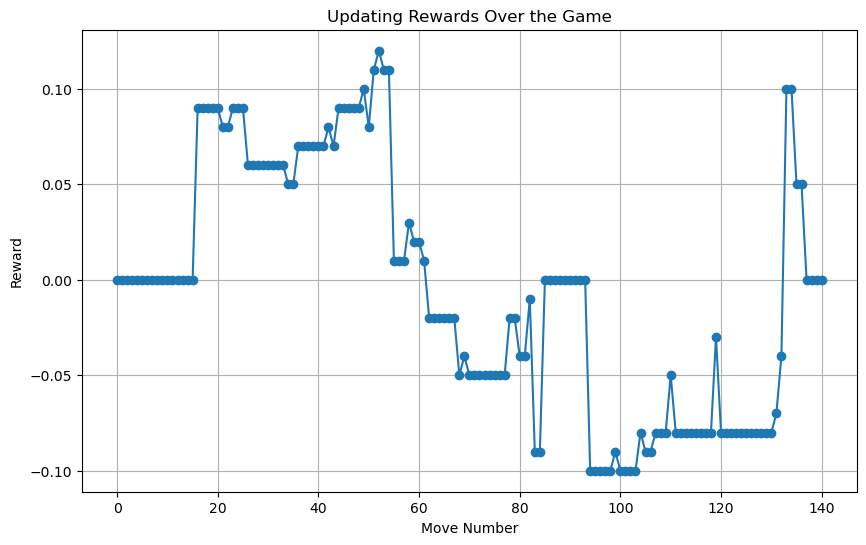

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(rewards, marker='o')
plt.title('Updating Rewards Over the Game')
plt.xlabel('Move Number')
plt.ylabel('Reward')
plt.grid(True)
plt.show()

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
